In this kernel, I will analyze the Pokemon dataset and find some insights and find some best pokemons based on certain categories. Any ideas regarding finding more insights are encouraged.

In [77]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Pokemon.csv']


In [78]:
df = pd.read_csv("../input/Pokemon.csv")

In [79]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [80]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


I would like to Add Special Attack and Special Defense scores to Attack and Defense respectively

In [81]:
df["Attack"] = df["Attack"] + df["Sp. Atk"]
df["Defense"] = df["Defense"] + df["Sp. Def"]

In [82]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,114,114,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,142,143,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,182,183,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,222,243,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,112,93,60,50,65,1,False


In [83]:
df.drop(columns=["Sp. Atk","Sp. Def",], inplace=True)

In [84]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,114,114,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,142,143,60,1,False
2,3,Venusaur,Grass,Poison,525,80,182,183,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,222,243,80,1,False
4,4,Charmander,Fire,NaN,309,39,112,93,65,1,False


In [85]:
df.isna().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Speed           0
Generation      0
Legendary       0
dtype: int64

Here, in this kernel, I would like to analyze only Type 1 category.

In [86]:
df.drop(columns=["Type 2","#"], inplace=True)

In [87]:
df.head()

,Name,Type 1,Total,HP,Attack,Defense,Speed,Generation,Legendary
0,Bulbasaur,Grass,318,45,114,114,45,1,False
1,Ivysaur,Grass,405,60,142,143,60,1,False
2,Venusaur,Grass,525,80,182,183,80,1,False
3,VenusaurMega Venusaur,Grass,625,80,222,243,80,1,False
4,Charmander,Fire,309,39,112,93,65,1,False


In [88]:
df["Type 1"].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

So, it seems like Pokemons are divided to many Type 1 categories.

In [89]:
df.Generation.value_counts()

1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64

Pokemons are categorised into 6 Generations

Let's have a plot based on Generations and Type 1 with Y-axis as scores

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

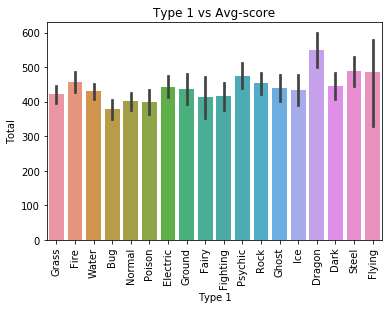

In [90]:
sns.barplot(x="Type 1",y = "Total", data = df).set_title("Type 1 vs Avg-score")
plt.xticks(rotation = 90)

So, Avg Total score for Pokemons of type Dragon, Steel, Flying are higher compared to that of other types.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Generation vs Avg-score')

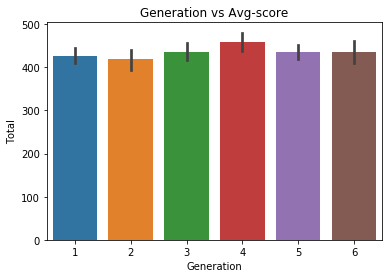

In [91]:
sns.barplot(x="Generation",y = "Total", data = df).set_title("Generation vs Avg-score")

Avg score of Generation 4 is higher compared to that of other Generations

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

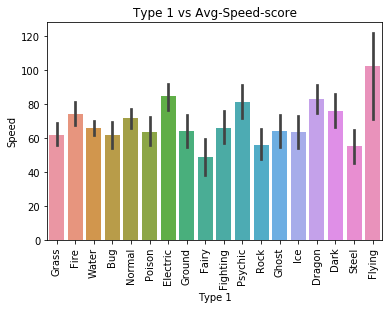

In [92]:
sns.barplot(x="Type 1",y = "Speed", data = df).set_title("Type 1 vs Avg-Speed-score")
plt.xticks(rotation = 90)

As Expected, Speed of Flying Pokemons is higher compared to that of other Pokemons

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

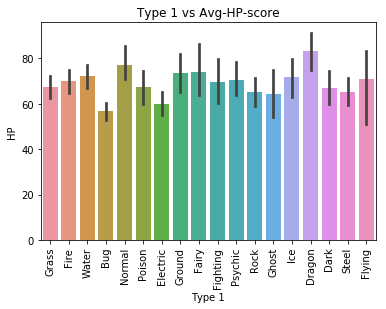

In [93]:
sns.barplot(x="Type 1",y = "HP", data = df).set_title("Type 1 vs Avg-HP-score")
plt.xticks(rotation = 90)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Generaion vs Avg-Speed-score')

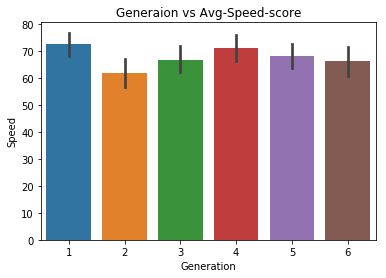

In [94]:
sns.barplot(x="Generation",y = "Speed", data = df).set_title("Generaion vs Avg-Speed-score")

Generation - 1 Pokemons have higher speed compared to that of other Generations

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Generation vs Avg-HP-score')

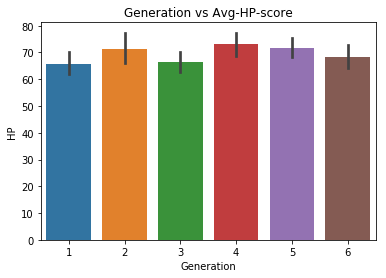

In [95]:
sns.barplot(x="Generation",y = "HP", data = df).set_title("Generation vs Avg-HP-score")

Let's plot overall data based on Total Scores

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

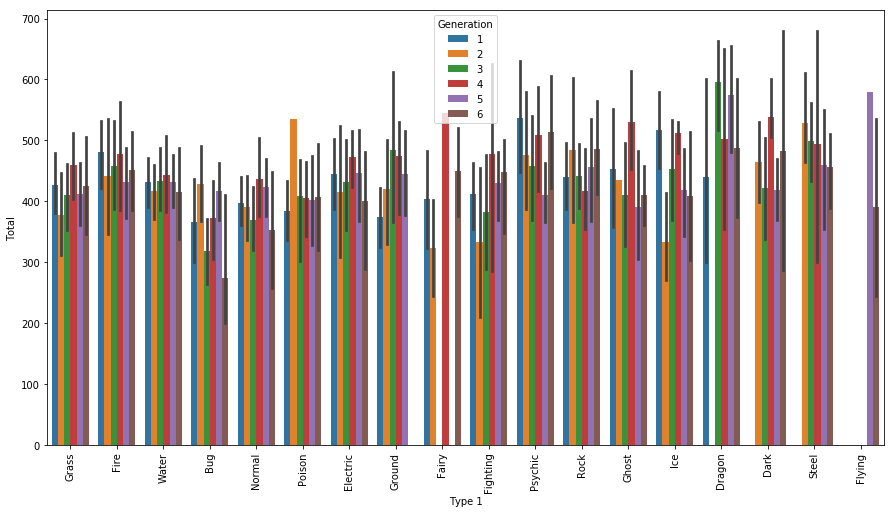

In [96]:
plt.figure(figsize=(15,8))
sns.barplot(x = "Type 1", y = "Total",hue = "Generation", data = df )
plt.xticks(rotation = 90)


In [97]:
df.groupby(["Type 1","Generation"])["Total"].mean()

Type 1    Generation
Bug       1             366.428571
          2             428.750000
          3             318.833333
          4             373.100000
          5             416.111111
          6             274.666667
Dark      2             465.000000
          3             421.666667
          4             538.333333
          5             417.923077
          6             483.333333
Dragon    1             440.000000
          3             596.666667
          4             502.500000
          5             575.000000
          6             488.000000
Electric  1             444.444444
          2             415.714286
          3             431.000000
          4             472.416667
          5             446.875000
          6             400.333333
Fairy     1             403.000000
          2             323.600000
          4             545.000000
          6             450.555556
Fighting  1             412.142857
          2             332.500000

In [99]:
print("\n best pokemons based on Total Scores of their respective Generations\n")
ref = dict(df.groupby(["Generation"])["Total"].max())
for i in range(1,7):
    print("\nGeneration : "+str(i)+": "+str(df[(df.Generation == i) & (df.Total == ref[i])].Name))


 best pokemons based on Total Scores of their respective Generations


Generation : 1: 163    MewtwoMega Mewtwo X
164    MewtwoMega Mewtwo Y
Name: Name, dtype: object

Generation : 2: 268    TyranitarMega Tyranitar
Name: Name, dtype: object

Generation : 3: 426    RayquazaMega Rayquaza
Name: Name, dtype: object

Generation : 4: 552    Arceus
Name: Name, dtype: object

Generation : 5: 711    KyuremBlack Kyurem
712    KyuremWhite Kyurem
Name: Name, dtype: object

Generation : 6: 796    DiancieMega Diancie
Name: Name, dtype: object


In [100]:
print("\n best pokemons based on Total Scores of their respective Types\n")
ref = dict(df.groupby(["Type 1"])["Total"].max())
for key,value in ref.items():
    print("best pokemon based on Type 1 : "+key+" : ",df[(df["Type 1"] == key) & (df.Total == value)].Name)


 best pokemons based on Total Scores of their respective Types

best pokemon based on Type 1 : Bug :  137          PinsirMega Pinsir
229          ScizorMega Scizor
232    HeracrossMega Heracross
717                   Genesect
Name: Name, dtype: object
best pokemon based on Type 1 : Dark :  793    Yveltal
Name: Name, dtype: object
best pokemon based on Type 1 : Dragon :  426    RayquazaMega Rayquaza
Name: Name, dtype: object
best pokemon based on Type 1 : Electric :  196    AmpharosMega Ampharos
Name: Name, dtype: object
best pokemon based on Type 1 : Fairy :  792    Xerneas
Name: Name, dtype: object
best pokemon based on Type 1 : Fighting :  498    LucarioMega Lucario
Name: Name, dtype: object
best pokemon based on Type 1 : Fire :  270    Ho-oh
Name: Name, dtype: object
best pokemon based on Type 1 : Flying :  702    TornadusIncarnate Forme
703      TornadusTherian Forme
Name: Name, dtype: object
best pokemon based on Type 1 : Ghost :  544    GiratinaAltered Forme
545     GiratinaOrig

Let's see the best and worst pokemons based on total scores

In [103]:
print("Top 5 Worst Pokemons based on Total scores")
df.sort_values(by = "Total")[:5]

Top 5 Worst Pokemons based on Total scores


,Name,Type 1,Total,HP,Attack,Defense,Speed,Generation,Legendary
206,Sunkern,Grass,180,30,60,60,30,2,False
322,Azurill,Normal,190,50,40,80,20,3,False
446,Kricketot,Bug,194,37,50,82,25,4,False
288,Wurmple,Bug,195,45,65,65,20,3,False
16,Weedle,Bug,195,40,55,50,50,1,False


In [105]:
print("Top 5 Best Pokemons based on Total scores")
df.sort_values(by = "Total",ascending = False)[:5]

Top 5 Best Pokemons based on Total scores


,Name,Type 1,Total,HP,Attack,Defense,Speed,Generation,Legendary
426,RayquazaMega Rayquaza,Dragon,780,105,360,200,115,3,True
164,MewtwoMega Mewtwo Y,Psychic,780,106,344,190,140,1,True
163,MewtwoMega Mewtwo X,Psychic,780,106,344,200,130,1,True
422,KyogrePrimal Kyogre,Water,770,100,330,250,90,3,True
424,GroudonPrimal Groudon,Ground,770,100,330,250,90,3,True


Please suggest me to improve the kernel further.